In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as graph
import seaborn as sns
import multiprocessing
import os
import imageio
from tqdm import tqdm, trange

apis_queen_file_path = '/home/arshad/Desktop/Bootstrap-results/apis-missense-queen-parallel-proper-5kiterations-protein-brock-chinese.csv'
apis_worker_file_path = '/home/arshad/Desktop/Bootstrap-results/apis-missense-worker-parallel-proper-5kiterations-protein-brock-chinese.csv'

In [ ]:
apis_queen= pd.read_csv(apis_queen_file_path)
apis_worker = pd.read_csv(apis_worker_file_path)

  0%|          | 0/2500 [00:00<?, ?it/s]/home/arshad/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/arshad/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/arshad/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
  1%|          | 20/2500 [00:02<05:18,  7.79it/s]/home/arshad/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
  8%|▊         | 2

KeyboardInterrupt: 

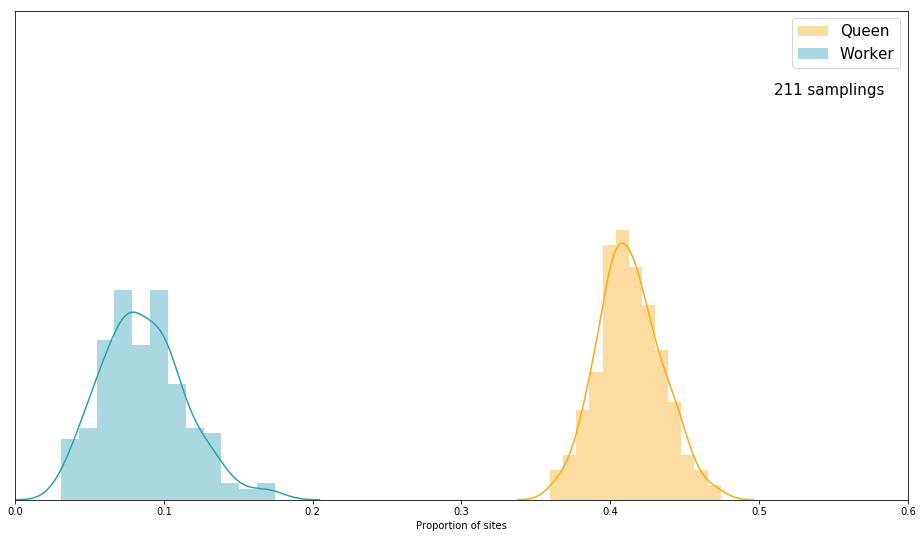

In [2]:
# for row_number in trange(len(apis_queen)):
for row_number in trange(2500):
    graph.figure(figsize=(16,9))
    queen = pd.read_csv(apis_queen_file_path)
    queen = queen[:row_number+1]
    worker = pd.read_csv(apis_worker_file_path)
    worker = worker[:row_number+1]
    sns.distplot(queen['infinity'], hist=True, norm_hist=True, kde=True, color='#FCAB10', label='Queen')
    sns.distplot(worker['infinity'], hist=True, norm_hist=True, kde=True, color='#2B9EB3', label='Worker')
    graph.xticks()
    graph.xlim(0, 0.6)
    graph.xlabel('Proportion of sites', fontsize=10)
#     graph.axvline(0.4353185, color='red')
    graph.yticks([])
    graph.ylim(0, 35)
    graph.text(0.51, 29, f'{row_number + 1} samplings', fontsize=15)
    graph.legend(fontsize=15)
    graph.savefig(f'/home/arshad/Desktop/graph_pictures/{row_number}.png', dpi=60)
#     graph.show()
    graph.clf()

In [2]:
image_folder = '/home/arshad/Desktop/graph_pictures/'

# exclude = ['apis-bootstrap-distribution.gif', 'bombus-bootstrap-distribution.gif', 
#            'polistes-bootstrap-distribution.gif', 'apis-queen-worker-bootstrap-distribution-hist.gif', 
#            'apis-queen-worker-bootstrap-distribution-hist-kde.gif']
# not in exclude

images = [x for x in os.listdir(image_folder) if x.endswith('.png') ]
sorted_images = sorted(images,key=lambda x: int(os.path.splitext(x)[0]))
gif = []

for file in tqdm(sorted_images, total=len(sorted_images)):
    gif.append(imageio.imread(f'{image_folder}{file}'))
# imageio.mimsave('/home/arshad/Desktop/graph_pictures/bootstrap-distribution.gif', gif)

100%|██████████| 2500/2500 [00:18<00:00, 137.02it/s]


In [3]:
imageio.mimsave('/home/arshad/Desktop/graph_pictures/apis-queen-worker-bootstrap-distribution-hist-kde-protein-brock-chinese.gif', gif)